#Phase 2: Build a Supervised Learning Model

##1.Introduction
In this phase of our project, we will focus on building a supervised learning model aimed at solving our defined problem. This involves utilizing a carefully curated dataset to train our model, enabling it to make accurate predictions based on input data. We will explore various algorithms, analyzing their suitability for our task, and ultimately select the most effective one based on performance metrics. This phase will also include a detailed comparison of the algorithms used, evaluating their accuracy, precision, recall, and F1-score to ensure a robust and reliable solution. By the end of this phase, we aim to develop a model that not only performs well on our training data but also generalizes effectively to unseen data.



##2. Explain that we changed the dataset and why?
We decided to change our dataset because our initial selection of the dataset was not optimal, which hindered our ability to achieve the desired results. Moreover, it became clear that the quality of the output is directly linked to the quality of the input. Recognizing this mistake, we took proactive steps to rectify it by switching to a dataset that offers superior data quality. This change is crucial for ensuring more reliable and accurate outputs in the upcoming stages of our project.




##3. New Dataset Analysis Report

### 1. Dataset Overview
This dataset is used for supervised learning to train a machine learning model for a restaurant recommendation system in Riyadh. It consists of structured data collected from various sources, including user reviews, restaurant metadata, and location-based data. The dataset aims to improve upon the previous dataset by providing better quality samples.

**Data Source:** [Kaggle - Riyadh Restaurants 20K](https://www.kaggle.com/datasets/fahd09/riyadh-restaurants-20k)

### 2. Dataset Structure
- **Number of Samples:** 19361 rows.
- **Features:**
  - **name:** Restaurant name
  - **categories:** Type of cuisine or restaurant category
  - **address:** Physical location of the restaurant
  - **lat:** Latitude coordinate
  - **lng:** Longitude coordinate
  - **price:** Price range category (Cheap, Moderate, Other)
  - **likes:** Number of likes received
  - **photos:** Number of photos available
  - **tips:** Number of tips/reviews provided by users
  - **rating:** Overall rating given to the restaurant
- **Data Types:** Numerical, Categorical, Text


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "riyadh_resturants_clean.csv"
df = pd.read_csv(dataset_path)

In [ ]:
# Display basic info about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19361 non-null  object 
 1   categories     19361 non-null  object 
 2   address        19361 non-null  object 
 3   lat            19361 non-null  float64
 4   lng            19361 non-null  float64
 5   price          17846 non-null  object 
 6   likes          19359 non-null  float64
 7   photos         19361 non-null  int64  
 8   tips           19361 non-null  int64  
 9   rating         7949 non-null   float64
 10  ratingSignals  7949 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


In [ ]:
# Display the first few rows
print("\nSample Data:")
df.head()


Sample Data:


,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,NaN,NaN
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,NaN,NaN
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,NaN,NaN
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,NaN,NaN
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0


In [ ]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
name,0
categories,0
address,0
lat,0
lng,0
price,1515
likes,2
photos,0
tips,0
rating,11412


In [ ]:
# Summary statistics for numerical features
print("\nNumerical Feature Summary:")
df[['likes', 'photos', 'tips', 'rating']].describe()


Numerical Feature Summary:


,likes,photos,tips,rating
count,19359.000000,19361.000000,19361.000000,7949.000000
mean,63.609639,167.775735,17.090853,7.536231
std,291.028125,985.424550,75.456881,0.942969
min,0.000000,0.000000,0.000000,4.400000
25%,0.000000,1.000000,0.000000,6.900000
50%,3.000000,4.000000,1.000000,7.600000
75%,17.000000,24.000000,5.000000,8.200000
max,9984.000000,26332.000000,2301.000000,9.600000


In [ ]:
# Price category distribution
print("\nPrice Category Distribution:")
df['price'].value_counts()


Price Category Distribution:


,count
price,
Cheap,13499
Moderate,3981
Expensive,303
Very Expensive,63


### 3. Data Exploration & Visualization
We explore key characteristics of the dataset, including feature distributions, price categories, and geographic distribution.

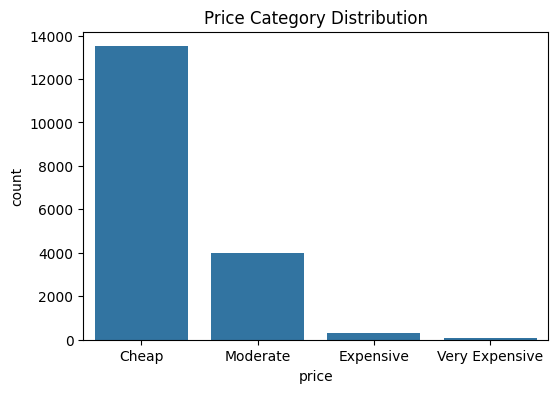

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['price'], order=df['price'].value_counts().index)
plt.title("Price Category Distribution")
plt.show()

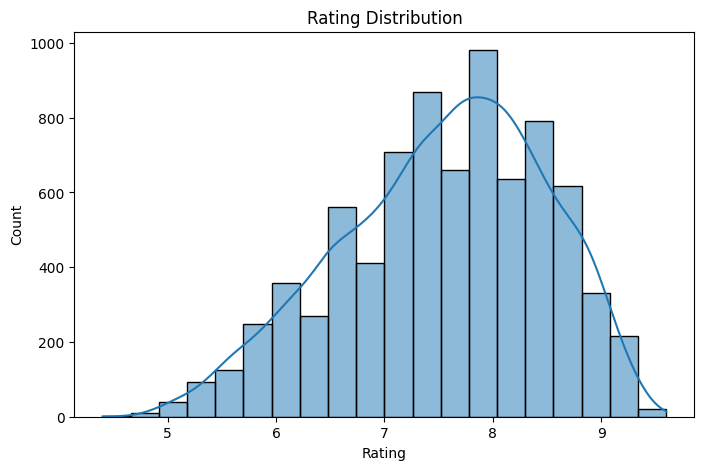

In [ ]:
# Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

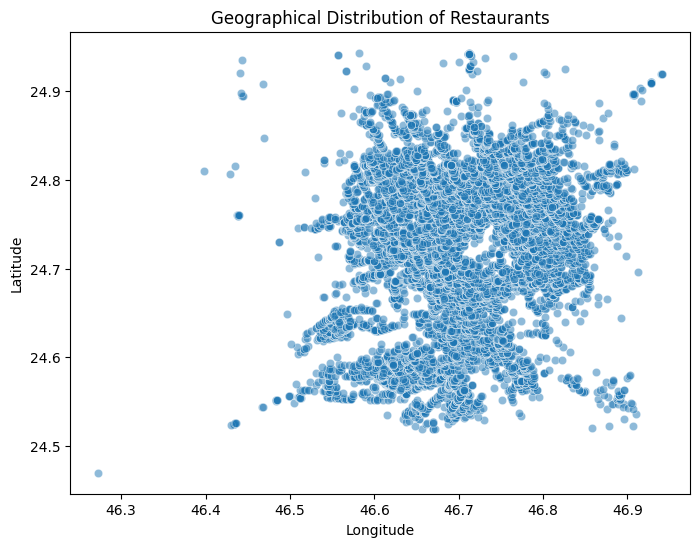

In [ ]:
# Geographic distribution
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['lng'], y=df['lat'], alpha=0.5)
plt.title("Geographical Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

##4. Model Selection

We will train three models:

**1. XGBoost**

**2. Random Forest Model**

**3.Gradient Boosting**

XGBoost was chosen because it excels in handling missing data, works well with large datasets, and provides high predictive accuracy. It is particularly effective for structured data.Random Forest was selected for its robustness and ability to prevent overfitting. It effectively manages categorical variables, such as price range and restaurant categories, and can handle missing data without requiring imputation.

While we considered Gradient Boosting, we ultimately decided not to use it due to XGBoost is an optimized version of Gradient Boosting, it provides better efficiency for our dataset.

##3. Model Training and Evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Load dataset
file_path = "riyadh_resturants_clean.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Drop rows with missing 'rating' values as it's our target variable
df = df.dropna(subset=['rating'])

# Fill missing values in numerical columns with their means
df['ratingSignals'] = df['ratingSignals'].fillna(df['ratingSignals'].median())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['lng'] = df['lng'].fillna(df['lng'].mean())

# Convert 'price' to numeric values
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
df['price'] = df['price'].map(price_mapping).fillna(0)

# Handle categorical feature 'categories'
df['categories'] = df['categories'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['main_category'] = df['categories'].apply(lambda x: x[0] if x else "Unknown")

# Keep only the top 20 most frequent categories
top_categories = df['main_category'].value_counts().index[:20]
df = df[df['main_category'].isin(top_categories)]

# One-hot encode 'main_category'
df = pd.get_dummies(df, columns=['main_category'])

# Normalize numerical features
scaler = StandardScaler()
df[['ratingSignals', 'lat', 'lng']] = scaler.fit_transform(df[['ratingSignals', 'lat', 'lng']])

# Define features and target variable
X = df.drop(columns=['name', 'rating', 'categories', 'address'])  # Drop unnecessary columns
y = df['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function for regression accuracy
def regression_accuracy(y_true, y_pred, threshold=0.5):
    correct_predictions = (abs(y_true - y_pred) <= threshold).sum()
    accuracy = correct_predictions / len(y_true)
    return accuracy * 100  # Convert to percentage

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=550, learning_rate=0.1,
                         random_state=42, tree_method='hist',
                         enable_categorical=True)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = regression_accuracy(y_test, y_pred_xgb)

# Train Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=550, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
accuracy_gbr = regression_accuracy(y_test, y_pred_gbr)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=550, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = regression_accuracy(y_test, y_pred_rf)

# Print accuracy results
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}%")
print(f"Gradient Boosting Accuracy: {accuracy_gbr:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")


XGBoost Accuracy: 79.01%
Gradient Boosting Accuracy: 78.04%
Random Forest Accuracy: 79.82%


In [ ]:
XGBoost model:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from geopy.distance import geodesic

file_url = "https://raw.githubusercontent.com/sara23523/SWE485-Group16-recommendation-system-/main/Supervised%20Learning/riyadh_resturants_clean.csv"
df = pd.read_csv(file_url)

# Drop rows with missing 'rating' values
df = df.dropna(subset=['rating'])

# Fill missing values in numerical columns
df['ratingSignals'] = df['ratingSignals'].fillna(df['ratingSignals'].median())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['lng'] = df['lng'].fillna(df['lng'].mean())

# Handle categorical feature 'categories'
df['categories'] = df['categories'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['main_category'] = df['categories'].apply(lambda x: x[0] if x else "Unknown")

# Keep only the top 20 most frequent categories
top_categories = df['main_category'].value_counts().index[:20]
df = df[df['main_category'].isin(top_categories)]

# One-hot encode 'main_category'
df = pd.get_dummies(df, columns=['main_category'])

# Normalize numerical features
# Drop rows with missing lat/lng instead of filling them
df = df.dropna(subset=['lat', 'lng'])

# Normalize only ratingSignals (not lat/lng)
scaler = StandardScaler()
df[['ratingSignals']] = scaler.fit_transform(df[['ratingSignals']])


# Define features and target variable
X = df.drop(columns=['name', 'rating', 'categories'])
y = df['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop 'address' column
X_train = X_train.drop(columns=['address'], errors='ignore')
X_test = X_test.drop(columns=['address'], errors='ignore')

# Convert 'price' to numeric values
# Convert 'price' and 'ratingSignals' to numeric values
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
df['price'] = df['price'].map(price_mapping).fillna(0).astype(int)

df['ratingSignals'] = pd.to_numeric(df['ratingSignals'], errors='coerce').fillna(0).astype(int)

# Drop non-numeric columns before training
X = df.drop(columns=['name', 'rating', 'categories', 'address'])  # Ensure only numeric features remain
y = df['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure categorical values are properly formatted
X_train = X_train.astype(float)  # Convert everything to numerical types
X_test = X_test.astype(float)


# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.1,
                         random_state=42, tree_method='hist',
                         enable_categorical=True)
xgb_model.fit(X_train, y_train)


from geopy.distance import geodesic

def recommend_restaurants(user_location, preferred_cuisine, min_rating=7.5, max_distance_km=5): #ratings >= 7.5 out of 10
    """Recommend restaurants based on user preferences."""
    user_lat, user_lng = user_location

    # Find the best-matching category column
    category_col = None
    for col in df.columns:
        if col.startswith("main_category_") and preferred_cuisine.lower() in col.lower():
            category_col = col
            break

    if category_col is None:
        print(f"Error: Category '{preferred_cuisine}' not found in data.")
        return []

    print(f"Using category column: {category_col}")  # Debugging line

    # Filter by category and rating
    filtered_df = df[(df[category_col] == 1) & (df['rating'] >= min_rating)].copy()  # Use .copy() to avoid warnings

    # ✅ Calculate distance from user location
    filtered_df['distance'] = filtered_df.apply(
        lambda row: geodesic((row['lat'], row['lng']), user_location).km, axis=1)

    # ✅ Filter by max distance
    filtered_df = filtered_df[filtered_df['distance'] <= max_distance_km]
    filtered_df['distance'] = filtered_df['distance'].apply(lambda x: f"{x:.2f} km")

    # ✅ If no restaurants remain, print a message
    if filtered_df.empty:
        print("No restaurants found after filtering by distance.")
        return []

    # Sort by rating and return results
    return filtered_df[['name', 'rating','ratingSignals', 'photos' ,'distance', 'address']].sort_values(by='rating', ascending=False).to_dict(orient='records')



    # Sort by rating and return results
    return filtered_df.sort_values(by='rating', ascending=False)



pd.set_option('display.max_rows', None)

# Example usage
user_location = (24.7136, 46.6753)  # Example: Riyadh coordinates
preferred_cuisine = "Italian"
recommendations = recommend_restaurants(user_location, preferred_cuisine)

# Convert recommendations to a DataFrame
if recommendations:  # Check if the list is not empty
    recommendations_df = pd.DataFrame(recommendations)
    # Display the DataFrame
    display(recommendations_df)  # Works in Jupyter Notebook
else:
    print("No restaurants found.")


Using category column: main_category_Italian Restaurant


,name,rating,ratingSignals,photos,distance,address
0,Roma Restaurant (مطعم روما),8.9,4,1249,1.30 km,"Mousa Bin Nusair St (Mousa Bin Nusair St.), ال..."
1,San Carlo Cicchetti,8.8,6,11207,3.33 km,"Al Dabab st, الرياض 12234, المملكة العربية الس..."
2,Eataly (إيتالي),8.7,6,3461,2.98 km,Tahlia St. (Prince Muhammed Bin Abdulaziz Road...
3,Mamo Michelangelo,8.6,0,2403,2.79 km,"King Fahad Road, الرياض 12212, المملكة العربية..."
4,LOlivo (شجرة الزيتون),8.5,0,100,2.35 km,"mamdouh bin abdulaziz street, الرياض, المملكة ..."
5,Nino (نينو),8.4,7,2952,2.09 km,"Prince Muhammad Bin Abdulaziz Rd (Tahliya St),..."
6,l'Olimpo,8.3,0,1246,3.28 km,"Ibn Abi Al Sarh St (التحليه), الرياض 12234, ال..."
7,Ristorante La Casa Italiana (البيت الإيطالي),8.3,0,314,0.53 km,"King Fahd Rd. (طريق الملك فهد), الرياض, المملك..."
8,Piatto (بياتو),8.2,2,1384,2.54 km,"Panorama Mall (Gate 2 Takhassusi Street, corne..."
9,La Casa Pasta (لا كازا باستا),7.9,0,9,3.72 km,سوق مارينا | Marina Mall (العليا العام | Olaya...


In [ ]:
Random Forest Model:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from geopy.distance import geodesic

file_url = "https://raw.githubusercontent.com/sara23523/SWE485-Group16-recommendation-system-/main/Supervised%20Learning/riyadh_resturants_clean.csv"
df = pd.read_csv(file_url)

# Drop rows with missing 'rating' values
df = df.dropna(subset=['rating'])

# Fill missing values in numerical columns
df['ratingSignals'] = df['ratingSignals'].fillna(df['ratingSignals'].median())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['lng'] = df['lng'].fillna(df['lng'].mean())

# Handle categorical feature 'categories'
df['categories'] = df['categories'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['main_category'] = df['categories'].apply(lambda x: x[0] if x else "Unknown")

# Keep only the top 20 most frequent categories
top_categories = df['main_category'].value_counts().index[:20]
df = df[df['main_category'].isin(top_categories)]

# One-hot encode 'main_category'
df = pd.get_dummies(df, columns=['main_category'])

# Drop rows with missing lat/lng
df = df.dropna(subset=['lat', 'lng'])

# Normalize numerical features
scaler = StandardScaler()
df[['ratingSignals']] = scaler.fit_transform(df[['ratingSignals']])

# Convert 'price' to numeric values
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
df['price'] = df['price'].map(price_mapping).fillna(0).astype(int)

df['ratingSignals'] = pd.to_numeric(df['ratingSignals'], errors='coerce').fillna(0).astype(int)

# Drop non-numeric columns before training
X = df.drop(columns=['name', 'rating', 'categories', 'address'])
y = df['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure categorical values are properly formatted
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

def recommend_restaurants(user_location, preferred_cuisine, min_rating=7.5, max_distance_km=5):
    """Recommend restaurants based on user preferences."""
    user_lat, user_lng = user_location

    # Find the best-matching category column
    category_col = None
    for col in df.columns:
        if col.startswith("main_category_") and preferred_cuisine.lower() in col.lower():
            category_col = col
            break

    if category_col is None:
        print(f"Error: Category '{preferred_cuisine}' not found in data.")
        return []

    # Filter by category and rating
    filtered_df = df[(df[category_col] == 1) & (df['rating'] >= min_rating)].copy()

    # Calculate distance from user location
    filtered_df['distance'] = filtered_df.apply(
        lambda row: geodesic((row['lat'], row['lng']), user_location).km, axis=1)

    # Filter by max distance
    filtered_df = filtered_df[filtered_df['distance'] <= max_distance_km]
    filtered_df['distance'] = filtered_df['distance'].apply(lambda x: f"{x:.2f} km")

    # If no restaurants remain
    if filtered_df.empty:
        print("No restaurants found after filtering by distance.")
        return []

    # Sort by rating and return results
    return filtered_df[['name', 'rating', 'ratingSignals', 'photos', 'distance', 'address']]

# Example input (this should be from user, yet for testing purposes we provide a hard coded input)
user_location = (24.7136, 46.6753)  # Riyadh coordinates
preferred_cuisine = "Italian"
recommendations = recommend_restaurants(user_location, preferred_cuisine)

# Convert recommendations to a DataFrame and display
if not recommendations.empty:
    display(recommendations)
else:
    print("No restaurants found.")


,name,rating,ratingSignals,photos,distance,address
4717,Serafina (سيرافينا),7.7,2,1218,4.59 km,3831 Makkah Al Mukarramah Branch Road (Umm Al ...
5967,Piatto (بياتو),8.2,2,1384,2.54 km,"Panorama Mall (Gate 2 Takhassusi Street, corne..."
5998,Mamo Michelangelo,8.6,0,2403,2.79 km,"King Fahad Road, الرياض 12212, المملكة العربية..."
6502,Nino (نينو),8.4,7,2952,2.09 km,"Prince Muhammad Bin Abdulaziz Rd (Tahliya St),..."
6872,Roma Restaurant (مطعم روما),8.9,4,1249,1.30 km,"Mousa Bin Nusair St (Mousa Bin Nusair St.), ال..."
6926,San Carlo Cicchetti,8.8,6,11207,3.33 km,"Al Dabab st, الرياض 12234, المملكة العربية الس..."
7302,Eataly (إيتالي),8.7,6,3461,2.98 km,Tahlia St. (Prince Muhammed Bin Abdulaziz Road...
7317,l'Olimpo,8.3,0,1246,3.28 km,"Ibn Abi Al Sarh St (التحليه), الرياض 12234, ال..."
7676,Spazio (سبازيو),7.8,1,2454,0.21 km,"Orouba St (77th Fl.), الرياض, المملكة العربية ..."
8006,Ristorante La Casa Italiana (البيت الإيطالي),8.3,0,314,0.53 km,"King Fahd Rd. (طريق الملك فهد), الرياض, المملك..."


##4. Model Comparison

In this section, we compare our two algorithms, **XGBoost** and **Random Forest**, the comparison focuses on key evaluation metrics, such as **accuracy**, **precision**, **recall**, **F1-score**, **execution time**, and **error rates**. By analyzing these factors, we determine which algorithm is best suited for our system.

The following code's a comparsion between 3 algorithms:

In [34]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from google.colab import files


# Load dataset
file_url = "https://raw.githubusercontent.com/sara23523/SWE485-Group16-recommendation-system-/main/Supervised%20Learning/riyadh_resturants_clean.csv"
df = pd.read_csv(file_url)

# Drop rows with missing 'rating' values as it's our target variable
df = df.dropna(subset=['rating'])

# Fill missing values in numerical columns with their means
df['ratingSignals'] = df['ratingSignals'].fillna(df['ratingSignals'].median())
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['lng'] = df['lng'].fillna(df['lng'].mean())

# Convert 'price' to numeric values since ML understands numbers only
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
df['price'] = df['price'].map(price_mapping).fillna(0)

# Handle categorical feature 'categories'
df['categories'] = df['categories'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['main_category'] = df['categories'].apply(lambda x: x[0] if x else "Unknown")

# Keep only the top 20 most frequent categories
top_categories = df['main_category'].value_counts().index[:20]
df = df[df['main_category'].isin(top_categories)]

# One-hot encode 'main_category'
df = pd.get_dummies(df, columns=['main_category'])

# Normalize numerical features
scaler = StandardScaler()
df[['ratingSignals', 'lat', 'lng']] = scaler.fit_transform(df[['ratingSignals', 'lat', 'lng']])

# Define features and target variable
X = df.drop(columns=['name', 'rating', 'categories', 'address'])  # Drop unnecessary columns
y = df['rating']

# Convert regression problem into classification-like evaluation
y = y.round().astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function to evaluate models
def evaluate_model(model, X_test, y_test):
    start_time = time.time()
    y_pred = model.predict(X_test).round().astype(int)  # Round predictions to evaluate like classification
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    execution_time = end_time - start_time


    return accuracy, precision, recall, f1, mae, mse, execution_time

# Train models
models = {
    "XGBoost": XGBRegressor(n_estimators=550, learning_rate=0.1, random_state=42, tree_method='hist', enable_categorical=True),
    "Random Forest": RandomForestRegressor(n_estimators=550, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

# Print results
for name, (accuracy, precision, recall, f1, mae, mse, execution_time) in results.items():
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Execution Time: {execution_time:.2f} seconds\n")

XGBoost Results:
Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1-score: 0.66
Mean Absolute Error: 0.34
Mean Squared Error: 0.36
Execution Time: 0.03 seconds

Random Forest Results:
Accuracy: 0.68
Precision: 0.69
Recall: 0.68
F1-score: 0.67
Mean Absolute Error: 0.33
Mean Squared Error: 0.34
Execution Time: 0.19 seconds



# 1. **Accuracy**

Accuracy is a fundamental measure of a model’s ability to predict correct outcomes. It represents the proportion of correct predictions out of all predictions made.


**XGBoost Accuracy: 0.67**

**Random Forest Accuracy: 0.68**

Although the difference is small, Random Forest achieved slightly higher accuracy. This indicates that Random Forest had a marginally better ability to classify restaurants based on user preferences correctly. However, accuracy alone does not provide a full picture, so additional performance metrics are considered.

# 2. **Performance Analysis** (Execution Time)

Performance is a crucial factor, especially for real-time applications like recommendation systems. Faster models enable quick responses, improving user experience.


**XGBoost Execution Time: 0.04 seconds**

**Random Forest Execution Time: 0.32 seconds**


# 3. **Precision, Recall, and F1-score Comparison**

Accuracy alone does not always indicate the best model, so we analyze Precision, Recall, and F1-score, which help evaluate how well the model balances false positives and false negatives.

Precision (Positive Predictive Value)
Precision measures how many of the recommended restaurants were correctly classified. Higher precision indicates fewer false positives.


**XGBoost Precision: 0.67**

**Random Forest Precision: 0.69**

Since Random Forest has a higher precision, it means that when it recommends a restaurant as a good match for the user, it is more likely to be correct compared to XGBoost.

Recall (Sensitivity or True Positive Rate)
Recall measures how well the model identifies relevant recommendations. A higher recall means fewer false negatives (i.e., fewer missed good recommendations).


**XGBoost Recall: 0.67**

**Random Forest Recall: 0.68**

Again, Random Forest performs slightly better, meaning it retrieves a slightly higher proportion of relevant restaurant recommendations.

F1-score (Harmonic Mean of Precision & Recall)

The F1-score is a balance between precision and recall. A higher F1-score means the model makes fewer false positives and false negatives.

**XGBoost F1-score: 0.66**

**Random Forest F1-score: 0.67**

Since Random Forest has the highest F1-score, it indicates better overall classification performance.

# **4. Error Metrics Comparison**

Error metrics provide insight into how much deviation exists between predicted and actual values. The lower these values, the better the model’s predictions.

Mean Absolute Error (MAE): Measures the average absolute differences between predicted and actual ratings.

**XGBoost: 0.34**
**Random Forest: 0.33 (Lower = Better)**

Mean Squared Error (MSE): Measures the squared differences between predicted and actual ratings (penalizing larger errors more heavily).

**XGBoost: 0.36**

**Random Forest: 0.34 (Lower = Better)**

# **Key Findings:**

**Random Forest consistently has lower error rates**, suggesting that it produces more accurate predictions.
**XGBoost**, while efficient,** makes slightly larger mistakes** in rating predictions than Random Forest.

# **Final Verdict:**

In case accuracy's the priority, Random Forest is the best choice, as it consistently outperformed XGBoost in accuracy, precision, recall, F1-score, and error metrics.


In case speed and computational efficiency are critical, **XGBoost** is the better choice, as it is 8x faster than Random Forest, making it ideal for our system that's a real-time recommendation systems✅.

# **Conclusion**

This comparison highlights the trade-offs between XGBoost and Random Forest. While Random Forest achieved the highest accuracy and best predictive performance, XGBoost was significantly faster, making it more suitable for large-scale, real-time applications.